In [63]:
import warnings
import itertools
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, SGDRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import confusion_matrix, accuracy_score

In [92]:
df = pd.read_csv('../data/processed/cleaned_ex2.csv')
df.fillna(360, inplace=True)
Loan_Id = df['Loan_ID']
df['LoanAmount'] = df['LoanAmount'].map(int)
data_preprocess = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]
# df.drop([])

In [93]:
# data_preprocess.reset_index(inplace=True)
data_preprocess["Married"] = data_preprocess["Married"].apply(lambda x: 1 if x == 'Yes' else 0)
data_preprocess["Education"] = data_preprocess["Education"].apply(lambda x: 1 if x == 'Graduate' else 0)
data_preprocess["Self_Employed"]  = data_preprocess["Self_Employed"].apply(lambda x: 1 if x == 'Yes' else 0)
data_preprocess["Gender"] = data_preprocess["Gender"].apply(lambda x: 1 if x == 'Male' else 0)
data_preprocess["Dependents"] = data_preprocess["Dependents"].apply(lambda x: 3 if x == '3+' else int(x))
trn_data = pd.get_dummies(data_preprocess.loc[:,:'Property_Area'])

In [94]:
trn_data.head()
# df.head()
index_X = df.Loan_Status[df.Loan_Status == 'X'].index
index_YN = df.Loan_Status[df.Loan_Status != 'X'].index

In [95]:
# df[['Gender', 'Married',
#        'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
#        'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
#        'Property_Area']]

# loan_term_df = df[['Loan_Amount_Term', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]


# loan_term_df = df[['Loan_Amount_Term', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]

# data_preprocess["Loan_Status"].values

# data_preprocess.info()

taget_Var = df["Loan_Status"].iloc[index_YN].apply(lambda x: 1 if x == 'Y' else 0)
X_train, X_test, y_train, y_test = train_test_split(trn_data.iloc[index_YN].values, df["Loan_Status"].iloc[index_YN],  test_size=0.3, random_state= 24)


In [96]:

# loan_term_df['Self_Employed'] = loan_term_df['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0)

# df.columns
# df["Loan_Status"].iloc[index_YN]

In [97]:
# data_trn = loan_term_df[loan_term_df["Loan_Amount_Term"].notnull()]

# data_trn.info()
# y_train[0]

In [112]:
# X_train, X_test, y_train, y_test = train_test_split(trn_data.loc[:,"ApplicantIncome":].values, data_trn["Loan_Amount_Term"].values,  test_size=0.01, random_state= 24)
xgbRer = XGBClassifier(learning_rate=0.02, n_estimators=300, random_state=42, booster="gbtree", n_jobs=1000)
xgbRer.fit(X_train, y_train)
print(xgbRer.score(X_train, y_train))
y_pred = xgbRer.predict(X_test)
xgbRer.score(X_test, y_test)

0.8391608391608392


0.7621621621621621

In [134]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
acc_score = (TP + TN)/float(TP+FP+FN+TN)
classification_error = (FP + FN)/ float(TP + FP + FN + TN)
precision = TP/float(TP + FP)
sensitivity = recall = TP/float(TP+FN)
specipecity = TN/float(TN + FP)

print()
print("accuracy  score: ", acc_score)
print("classification error: ", classification_error)
print("precision:", precision)
print("recall or sensitivity", sensitivity)
print("specificity", specipecity)


[[ 21  30]
 [ 14 120]]

accuracy  score:  0.7621621621621621
classification error:  0.23783783783783785
precision: 0.8
recall or sensitivity 0.8955223880597015
specificity 0.4117647058823529


In [116]:
#prediction
print(xgbRer.predict(X_test)[0:10])

#probability
print(xgbRer.predict_proba(X_test)[0:10])

['N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y']
[[0.54667354 0.45332643]
 [0.68675256 0.31324744]
 [0.33230942 0.6676906 ]
 [0.7263261  0.27367392]
 [0.2244761  0.7755239 ]
 [0.15241706 0.84758294]
 [0.1560635  0.8439365 ]
 [0.66508436 0.33491564]
 [0.13046569 0.8695343 ]
 [0.0825808  0.9174192 ]]


Text(0,0.5,'frequescy')

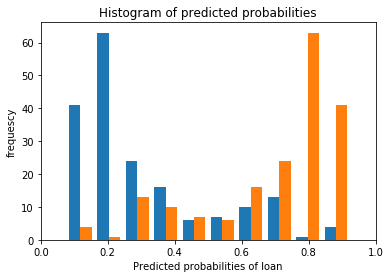

In [126]:
# store the predicted probabilities for class 1
y_pred_prob = xgbRer.predict_proba(X_test)

plt.hist(y_pred_prob)

plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probabilities of loan")
plt.ylabel("frequescy")

In [135]:
# predict loans if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(y_pred_prob, 0.4)[0]

In [136]:
y_pred_class

array([1., 1.], dtype=float32)

In [137]:
confusion_matrix(y_test, y_pred_class)

ValueError: Found input variables with inconsistent numbers of samples: [185, 2]

In [59]:
lrr = RandomForestClassifier(n_estimators=100, min_samples_split=2, n_jobs=1000)
lrr.fit(X_train, y_train)
print(lrr.score(X_train, y_train))
lrr.score(X_test, y_test)

1.0


0.7398373983739838

In [101]:
# df['Loan_Amount_Term'].plot()
# plt.show()
lrr.predict(loan_term_df[loan_term_df["Loan_Amount_Term"].isnull()].loc[:,"ApplicantIncome":].values)

array([365.4 , 349.2 , 339.6 , 339.78, 340.68, 360.  , 355.2 , 298.2 ,
       334.18, 355.2 , 357.6 , 345.24, 341.04, 343.44, 354.  , 343.8 ,
       329.64, 340.2 , 342.12, 351.36])

In [88]:
# loan_term_df[loan_term_df["Loan_Amount_Term"] == 360]

In [82]:
help(xgbRer)

Help on XGBRegressor in module xgboost.sklearn object:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  Implementation of the scikit-learn API for XGBoost regression.
 |      Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of boosted trees to fit.
 |  silent : boolean
 |      Whether to print messages while running boosting.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  booster: string
 |      Specify which booster to use: gbtree, gblinear or dart.
 |  nthread : int
 |      Number of parallel threads used to run xgboost.  (Deprecated, please use n_jobs)
 |  n_jobs : int
 |      Number of parallel threads used to run xgboost.  (replaces nthread)
 |  gamma : float
 |      Minimum loss reduc

In [73]:
(lrr.score)

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1000,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [89]:
# data_preprocesss

In [91]:
trn_data['LoanAmount'].map(int)

0      128
1       66
2      120
3      141
4      267
5       95
6      158
7      168
8      349
9       70
10     200
11     114
12      17
13     125
14     100
15      76
16     133
17     104
18     315
19     116
20     112
21     191
22     122
23     110
24      35
25      74
26     106
27     114
28     320
29     100
      ... 
951    125
952     40
953    122
954    134
955    101
956    130
957     98
958    257
959    156
960    117
961    128
962     65
963    401
964     54
965    118
966     59
967    141
968    216
969     88
970    119
971    137
972    170
973    126
974    125
975    159
976    108
977    191
978    197
979    316
980    112
Name: LoanAmount, Length: 981, dtype: int64